In [12]:
import cv2
import numpy as np
import os

def get_image_list(root_path):
    image_list = []
    for root, dirs, files in os.walk(root_path):
        for filename in files:
            if filename.endswith(('.jpeg', '.jpg')):
                image_list.append(os.path.join(root, filename))
    return image_list

def calculate_mean_and_std(image_path_list):
    mean_a_list, mean_b_list, std_a_list, std_b_list = [], [], [], []
    for image_path in image_path_list:
        # Load the image and convert it to Lab color space
        img = cv2.imread(image_path)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

        # Mask black pixels in the a* and b* channels
        mask = lab[:,:,0] > 0
        a_channel = lab[:,:,1][mask]
        b_channel = lab[:,:,2][mask]

        # Calculate the mean and standard deviation of the a* and b* channels
        mean_a = np.mean(a_channel)
        mean_b = np.mean(b_channel)
        std_a = np.std(a_channel)
        std_b = np.std(b_channel)

        mean_a_list.append(mean_a)
        mean_b_list.append(mean_b)
        std_a_list.append(std_a)
        std_b_list.append(std_b)

    mean_a = np.mean(mean_a_list)
    mean_b = np.mean(mean_b_list)
    std_a = np.mean(std_a_list)
    std_b = np.mean(std_b_list)

    return mean_a, mean_b, std_a, std_b


def color_correction(image_path, ref_mean_a, ref_mean_b, ref_std_a, ref_std_b):
    # Load the image and convert it to Lab color space
    img = cv2.imread(image_path)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Mask black pixels in the a* and b* channels
    mask = lab[:,:,0] > 0
    a_channel = lab[:,:,1][mask]
    b_channel = lab[:,:,2][mask]

    # Calculate the mean and standard deviation of the a* and b* channels
    mean_a = np.mean(a_channel)
    mean_b = np.mean(b_channel)
    std_a = np.std(a_channel)
    std_b = np.std(b_channel)

    # Calculate the scaling factors for the a* and b* channels
    scale_a = (ref_mean_a / ref_std_a) * std_a
    scale_b = (ref_mean_b / ref_std_b) * std_b

    # Apply the scaling factors to the a* and b* channels
    lab[:,:,1][mask] = np.clip((a_channel - mean_a) * (scale_a / std_a) + ref_mean_a, 0, 255)
    lab[:,:,2][mask] = np.clip((b_channel - mean_b) * (scale_b / std_b) + ref_mean_b, 0, 255)

    # Convert the image back to BGR color space
    corrected_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    return corrected_img


lakecam_images_path = 'RGB color correction/lakecam/'
labcam_images_path = 'RGB color correction/labcam/'

# Get lists of image file paths
labcam_image_list = get_image_list(labcam_images_path)
lakecam_image_list = get_image_list(lakecam_images_path)

transferred_lab_image_list =[]

ref_mean_a, ref_mean_b, ref_std_a, ref_std_b = calculate_mean_and_std(lakecam_image_list)

for image_path in labcam_image_list:

    transferred_lab_image = color_correction(image_path, ref_mean_a, ref_mean_b, ref_std_a, ref_std_b)
    # transferred_lab_image_list.append(trans

    transferred_lab_image_list.append(transferred_lab_image)
    
    
    

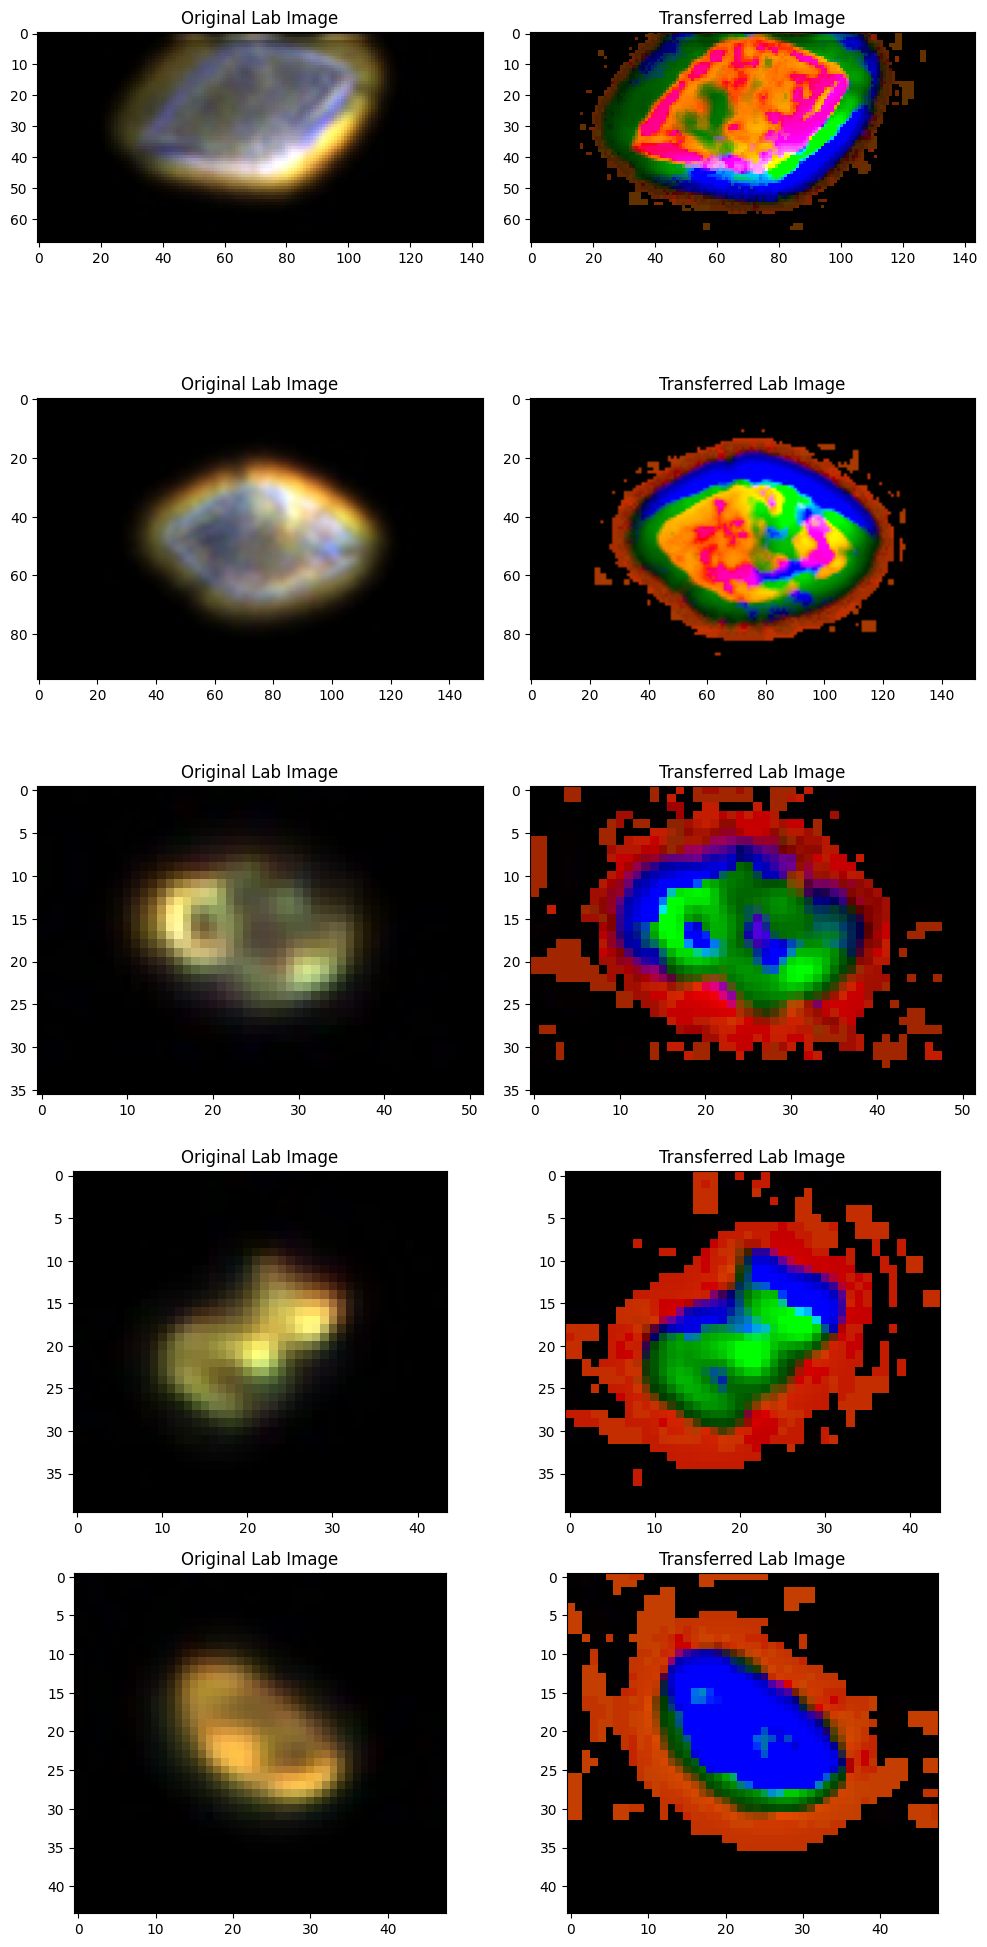

In [13]:
import os
import random
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
# Set the path to the image folder
# image_folder = 'RGB color correction/labcam/'
image_folder = 'RGB color correction/labcam/1585731301/images/'

labcam_image_list = get_image_list(image_folder)

# Select 5 random image filenames
random_filenames = random.sample(labcam_image_list, 5)

# Create a subplot with 5 rows and 2 columns
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

# Iterate over the 5 random filenames and plot the original and transferred images side by side
for i, filename in enumerate(random_filenames):
    # Load the lab image
    lab_image = io.imread(os.path.join(filename))
    
    # Transfer the color characteristics of the lake image to the lab image
    transferred_image = color_correction(filename, ref_mean_a, ref_mean_b, ref_std_a, ref_std_b)
    # transferred_image = color_transfer_on_single_image(filename, lake_mean, lake_std)
    
    # Plot the original and transferred images side by side
    ax[i, 0].imshow(lab_image)
    ax[i, 0].set_title('Original Lab Image')
    ax[i, 1].imshow(transferred_image)
    ax[i, 1].set_title('Transferred Lab Image')

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()

## Gray world algorithm

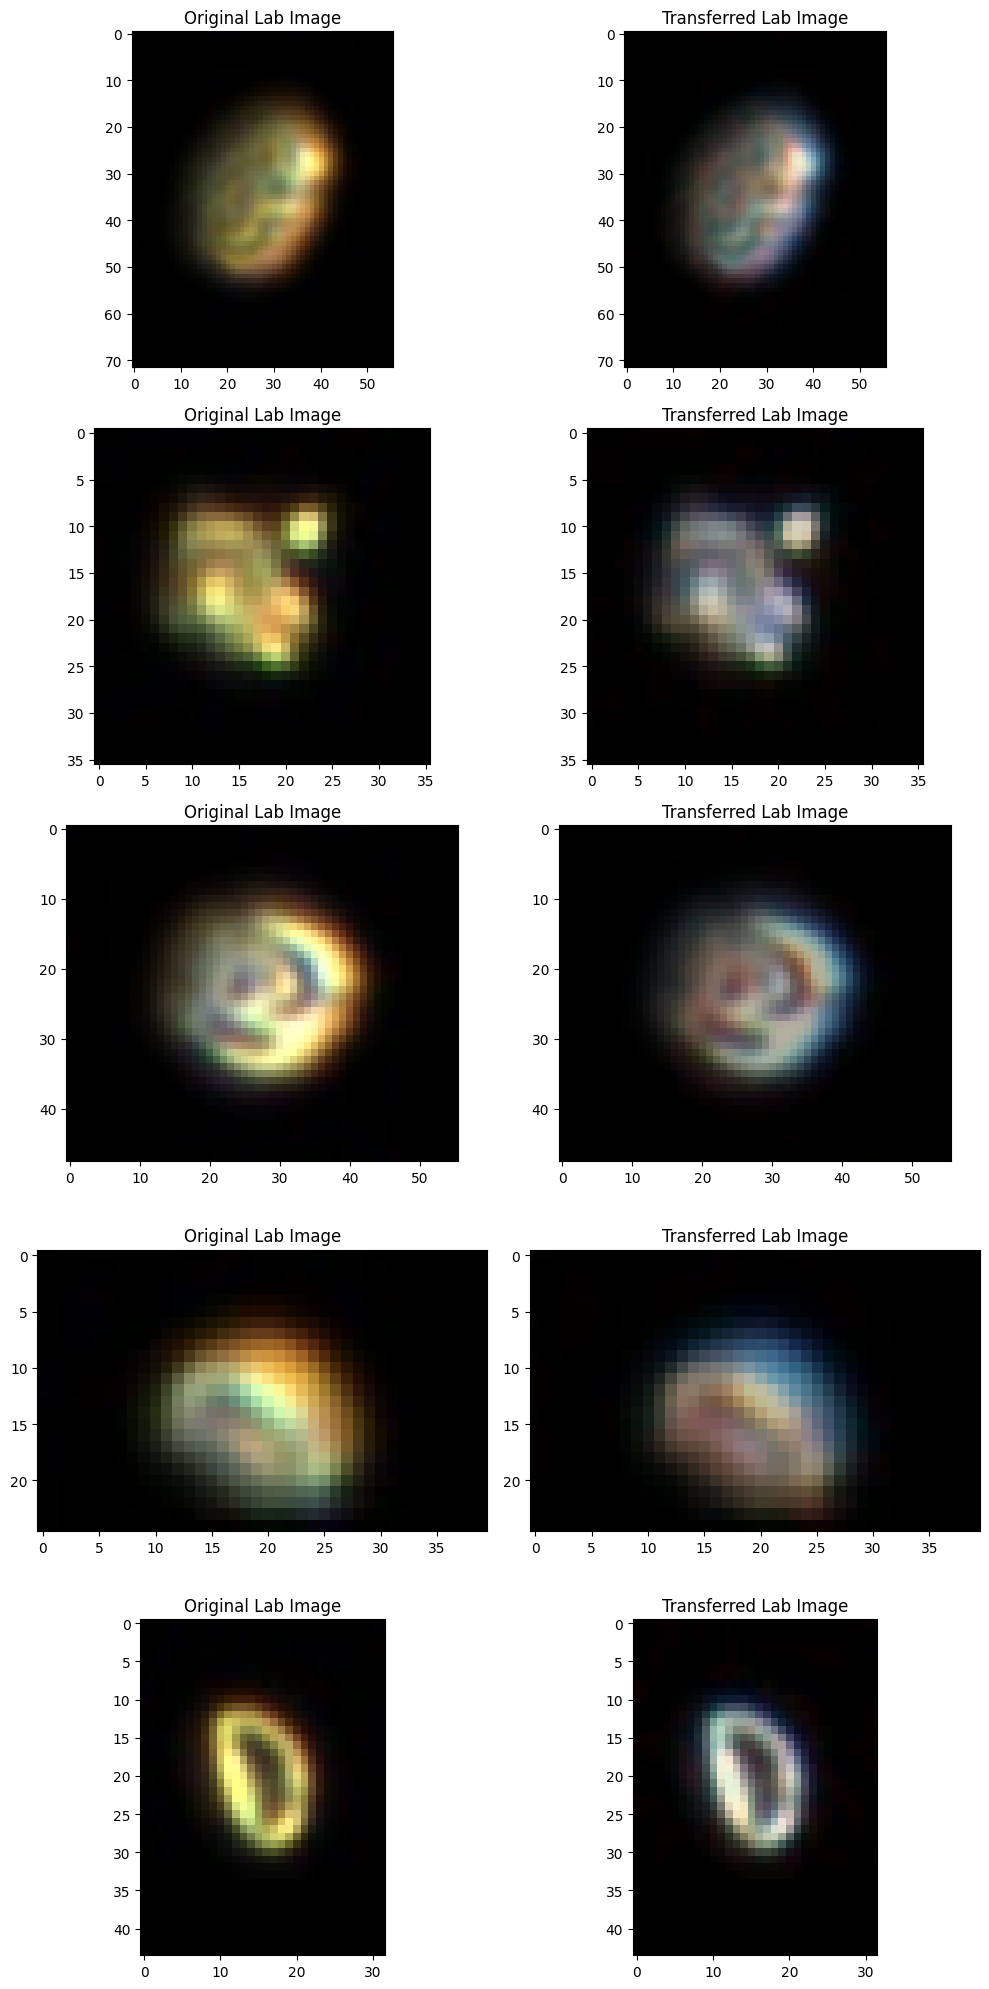

In [16]:
import cv2
import numpy as np
import os
import random
from skimage import io
from skimage import color
import matplotlib.pyplot as plt


def get_image_list(root_path):
    image_list = []
    for root, dirs, files in os.walk(root_path):
        for filename in files:
            if filename.endswith(('.jpeg', '.jpg')):
                image_list.append(os.path.join(root, filename))
    return image_list

def calculate_mean(image_path_list):
    # Initialize variables to store mean values for each color channel
    mean_r, mean_g, mean_b = 0, 0, 0

    # Loop through each image in the list
    for image_path in image_path_list:
        # Load the image
        img = cv2.imread(image_path)

        # Calculate the mean values for each color channel
        mean_r += np.mean(img[:, :, 0])
        mean_g += np.mean(img[:, :, 1])
        mean_b += np.mean(img[:, :, 2])

    # Calculate the overall mean values for each color channel
    num_images = len(image_path_list)
    mean_r /= num_images
    mean_g /= num_images
    mean_b /= num_images

    return mean_r, mean_g, mean_b

def gray_world(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the mean values for each color channel
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])

    # Calculate the scaling factors for each color channel
    scale_r = mean_g / mean_r
    scale_b = mean_g / mean_b

    # Apply the scaling factors to each color channel
    img[:, :, 0] = np.clip(img[:, :, 0] * scale_r, 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * scale_b, 0, 255)

    return img

def color_correction(image_path, ref_mean_r, ref_mean_g, ref_mean_b):
    # Load the image and apply gray world algorithm
    img = gray_world(image_path)

    # Calculate the mean values for each color channel
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])

    # Calculate the scaling factors for each color channel
    scale_r = ref_mean_g / mean_r
    scale_g = ref_mean_g / mean_g
    scale_b = ref_mean_g / mean_b

    # Apply the scaling factors to each color channel
    img[:, :, 0] = np.clip(img[:, :, 0] * scale_r, 0, 255)
    img[:, :, 1] = np.clip(img[:, :, 1] * scale_g, 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * scale_b, 0, 255)

    return img

lakecam_images_path = 'RGB color correction/lakecam/'
labcam_images_path = 'RGB color correction/labcam/'

# Get lists of image file paths
labcam_image_list = get_image_list(labcam_images_path)
lakecam_image_list = get_image_list(lakecam_images_path)

# Calculate the reference mean values for the lakecam images
ref_mean_r, ref_mean_g, ref_mean_b = calculate_mean(lakecam_image_list)

# Apply color correction to each image in the labcam image list
transferred_lab_image_list = []
for image_path in labcam_image_list:
    transferred_lab_image = color_correction(image_path, ref_mean_r, ref_mean_g, ref_mean_b)

    
    

# Set the path to the image folder
# image_folder = 'RGB color correction/labcam/'
image_folder = 'RGB color correction/labcam/1585731301/images/'

labcam_image_list = get_image_list(image_folder)

# Select 5 random image filenames
random_filenames = random.sample(labcam_image_list, 5)

# Create a subplot with 5 rows and 2 columns
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

# Iterate over the 5 random filenames and plot the original and transferred images side by side
for i, filename in enumerate(random_filenames):
    # Load the lab image
    lab_image = io.imread(os.path.join(filename))
    
    # Transfer the color characteristics of the lake image to the lab image
    transferred_image = color_correction(filename, ref_mean_r, ref_mean_g, ref_mean_b)
    # transferred_image = color_transfer_on_single_image(filename, lake_mean, lake_std)
    
    # Plot the original and transferred images side by side
    ax[i, 0].imshow(lab_image)
    ax[i, 0].set_title('Original Lab Image')
    ax[i, 1].imshow(transferred_image)
    ax[i, 1].set_title('Transferred Lab Image')

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()

## Using lake mean and std

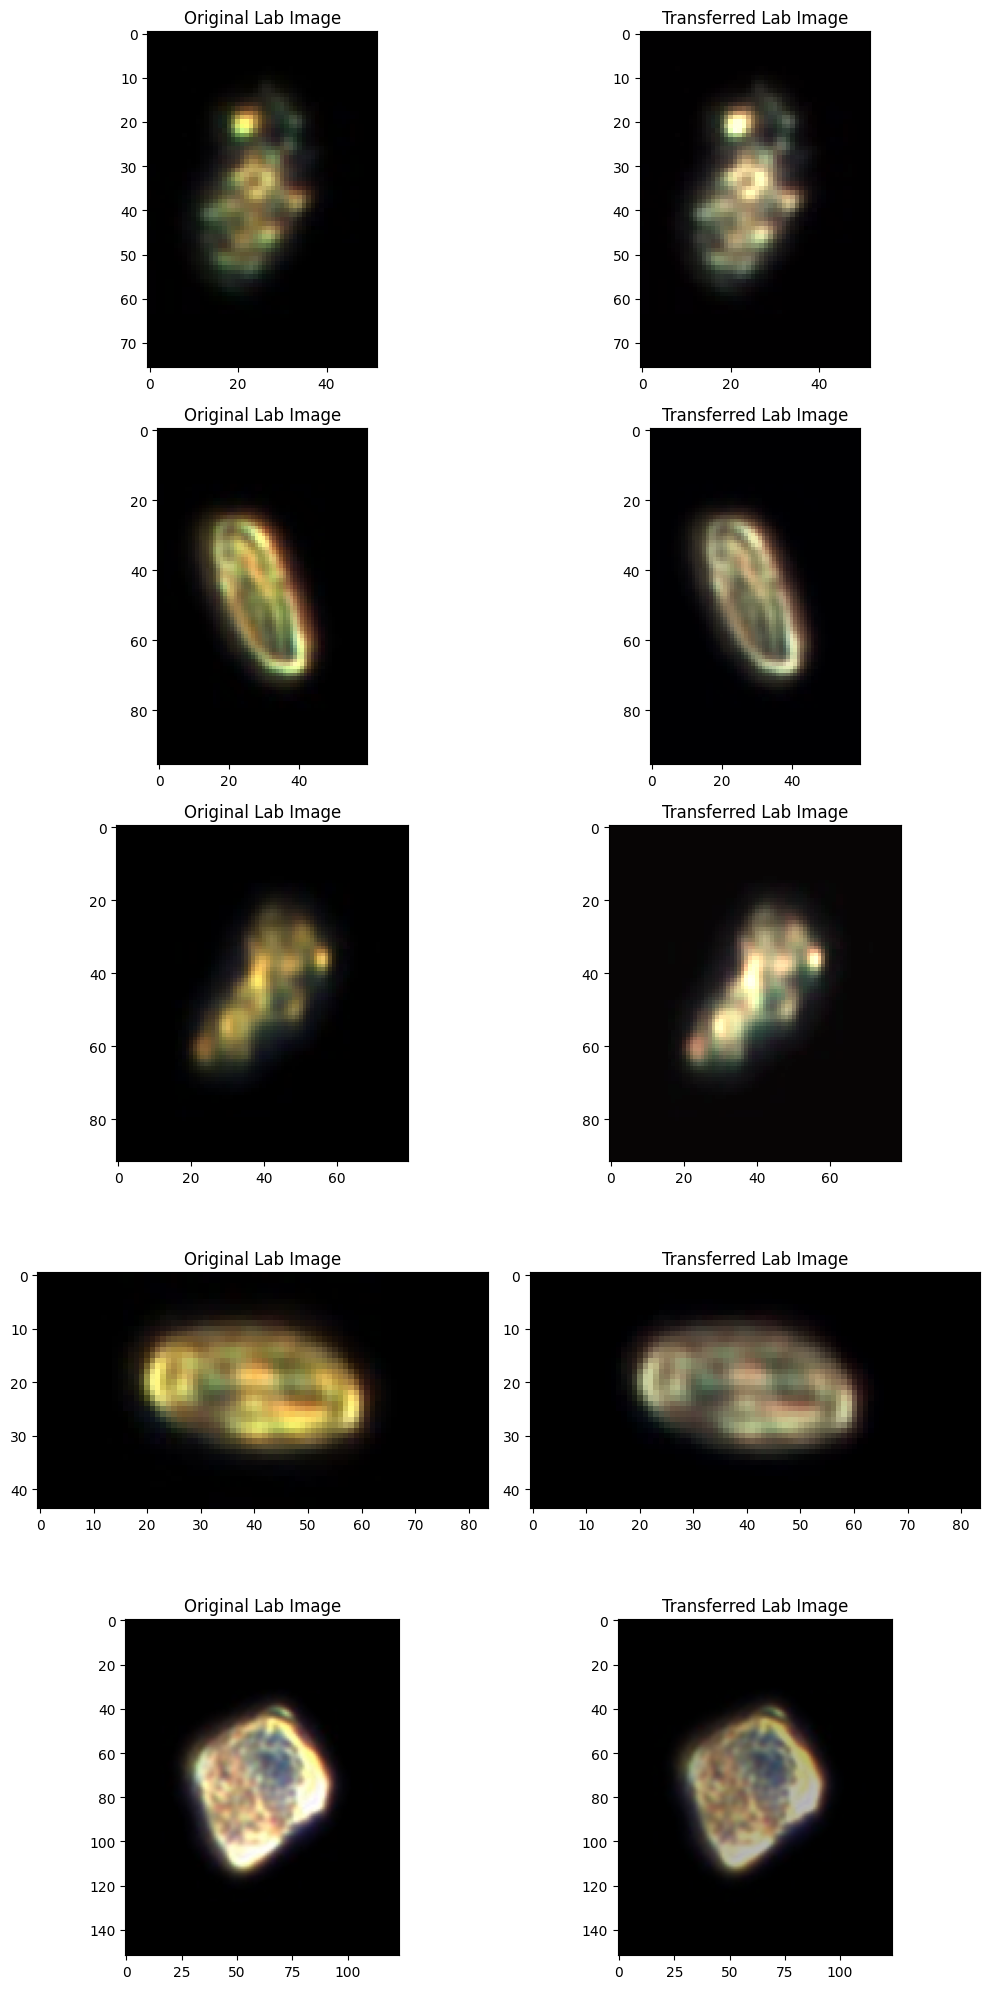

In [21]:
import os

import imageio
import numpy as np
import pandas as pd
import skimage
from skimage import color, io


def get_image_list(root_path):
    image_list = []
    for root, dirs, files in os.walk(root_path):
        for filename in files:
            if filename.endswith(('.jpeg', '.jpg')):
                image_list.append(os.path.join(root, filename))
    return image_list


def get_lake_color_characteristics(lakecam_images_path):
    # Get lists of image file paths
    lakecam_image_list = get_image_list(lakecam_images_path)

    # Load the set of images taken from the lake camera
    lake_images = [io.imread(image_path) for image_path in lakecam_image_list]

    # Calculate the mean and standard deviation of each channel in LAB color space for the lake images
    lake_mean = np.mean([color.rgb2lab(img).mean(axis=(0, 1)) for img in lake_images], axis=0)
    lake_std = np.mean([color.rgb2lab(img).std(axis=(0, 1)) for img in lake_images], axis=0)

    # Create a pandas DataFrame with the lake mean and standard deviation
    df = pd.DataFrame({'lake_mean': lake_mean, 'lake_std': lake_std})

    # Get the current working directory and concatenate the Excel file name to it
    current_directory = os.getcwd()
    excel_file_path = os.path.join(current_directory, 'lake_color_characteristics.xlsx')

    # Write the DataFrame to an Excel file with headers
    # df.to_excel(excel_file_path, index=False, header=['lake_mean', 'lake_std'], mode='w')
    df.to_excel(excel_file_path, index=False, header=['lake_mean', 'lake_std'])

    return lake_mean, lake_std


def load_lake_color_characteristics(excel_file_name):
    # Get the Excel file path
    current_directory = os.getcwd()
    excel_file_path = os.path.join(current_directory, excel_file_name)

    # Load the Excel file as a pandas DataFrame, or return None if it doesn't exist
    if not os.path.exists(excel_file_path):
        print(f"Excel file '{excel_file_name}' doesn't exist in the current directory.")
        return None
    df = pd.read_excel(excel_file_path)

    # Extract the lake mean and standard deviation from the DataFrame
    lake_mean = df['lake_mean'].values
    lake_std = df['lake_std'].values

    return lake_mean, lake_std


def color_transfer_on_image(labcam_image_path, lake_mean, lake_std):
    lab_image = io.imread(labcam_image_path)
    # Calculate the mean and standard deviation of each channel in LAB color space for the input lab image
    lab_mean = color.rgb2lab(lab_image).mean(axis=(0, 1))
    lab_std = color.rgb2lab(lab_image).std(axis=(0, 1))

    # Compute the color transform from the lab image to the lake image
    a = (lake_std / lab_std) * (color.rgb2lab(lab_image) - lab_mean) + lake_mean
    img_transfer = color.lab2rgb(a)

    return img_transfer


def color_transfer_on_single_image(labcam_image_path, lake_mean, lake_std):
    # Load the LAB image
    lab_image = io.imread(labcam_image_path)

    # Calculate the mean and standard deviation of each channel in LAB color space for the input lab image
    lab_mean = color.rgb2lab(lab_image).mean(axis=(0, 1))
    lab_std = color.rgb2lab(lab_image).std(axis=(0, 1))

    # Compute the color transform from the lab image to the lake image
    a = (lake_std / lab_std) * (color.rgb2lab(lab_image) - lab_mean) + lake_mean
    img_transfer = color.lab2rgb(a)

    return img_transfer


def color_transfer_on_image_list(labcam_images_path, lake_mean, lake_std, output_directory):
    # Get lists of image file paths
    labcam_image_list = get_image_list(labcam_images_path)

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Iterate over all the LAB images in the input directory
    for lab_image_path in labcam_image_list:
        # Load the LAB image
        lab_image = io.imread(lab_image_path)

        # Calculate the mean and standard deviation of each channel in LAB color space for the input lab image
        lab_mean = color.rgb2lab(lab_image).mean(axis=(0, 1))
        lab_std = color.rgb2lab(lab_image).std(axis=(0, 1))

        # Compute the color transform from the lab image to the lake image
        a = (lake_std / lab_std) * (color.rgb2lab(lab_image) - lab_mean) + lake_mean
        img_transfer = color.lab2rgb(a)

        # Get the file name from the lab_image_path
        filename = os.path.basename(lab_image_path)

        # Save the result as a JPEG image in the output directory
        output_path = os.path.join(output_directory, filename)
        os.makedirs(output_directory, exist_ok=True)

        # Convert the image to uint8
        img_uint8 = skimage.img_as_ubyte(img_transfer)

        # Save the uint8 image
        imageio.imwrite(output_path, img_uint8)

        # io.imsave(output_path, img_transfer, quality=95)

    return

lakecam_images_path = 'RGB color correction/lakecam/'
labcam_images_path = 'RGB color correction/labcam/'

# Get lists of image file paths
labcam_image_list = get_image_list(labcam_images_path)
lakecam_image_list = get_image_list(lakecam_images_path)

transferred_lab_image_list =[]

lake_mean, lake_std = get_lake_color_characteristics(lakecam_images_path)

for image_path in labcam_image_list:

    transferred_lab_image = color_transfer_on_single_image(image_path, lake_mean, lake_std)
    transferred_lab_image_list.append(transferred_lab_image)
    
    
    
import os
import random
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
# Set the path to the image folder
# image_folder = 'RGB color correction/labcam/'
image_folder = 'RGB color correction/labcam/1585731301/images/'

labcam_image_list = get_image_list(image_folder)

# Select 5 random image filenames
random_filenames = random.sample(labcam_image_list, 5)

# Create a subplot with 5 rows and 2 columns
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

# Iterate over the 5 random filenames and plot the original and transferred images side by side
for i, filename in enumerate(random_filenames):
    # Load the lab image
    lab_image = io.imread(os.path.join(filename))
    
    # Transfer the color characteristics of the lake image to the lab image
    # transferred_image = color_transfer(lab_image, lake_mean, lake_std)
    transferred_image = color_transfer_on_single_image(filename, lake_mean, lake_std)
    
    # Plot the original and transferred images side by side
    ax[i, 0].imshow(lab_image)
    ax[i, 0].set_title('Original Lab Image')
    ax[i, 1].imshow(transferred_image)
    ax[i, 1].set_title('Transferred Lab Image')

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()